In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [74]:
df = pd.read_csv('all_data.csv')

In [27]:
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


<!-- There are no missing values in this database -->

In [95]:
scaler = MinMaxScaler()
gdp_scaled = scaler.fit_transform(np.array(df['GDP']).reshape(-1, 1))
df['gdp_scaled'] = gdp_scaled

years_order = df.groupby('Country')['Life expectancy at birth (years)'].mean().sort_values(ascending=False).index
gdp_order = df.groupby('Country')['GDP'].mean().sort_values(ascending=False).index

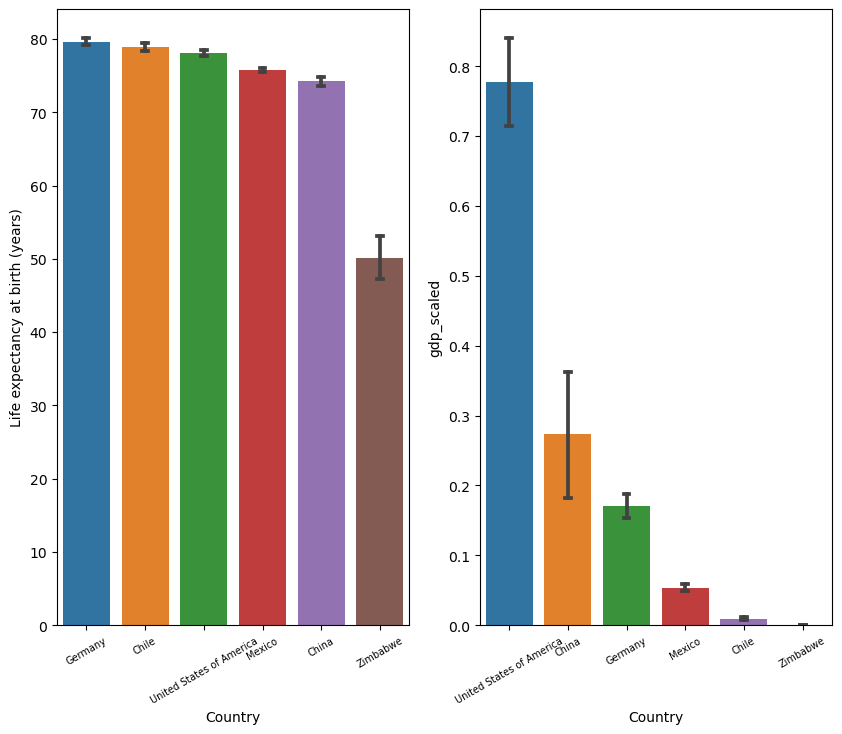

In [98]:
plt.figure(figsize=(10, 8))
ax1 = plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Country', y='Life expectancy at birth (years)', capsize=0.1, order=years_order)
plt.xticks(rotation=30, size=7)

ax2 = plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Country', y='gdp_scaled', capsize=0.1, order=gdp_order)
plt.xticks(rotation=30, size=7)
plt.show()

# Conclusion:

Based on the graphs provided above, GDP overall has a positive impact on life expectancy in a country. Higher GDP enables better quality and accessibility of healthcare, contributing significantly to longer and healthier lives for the population.

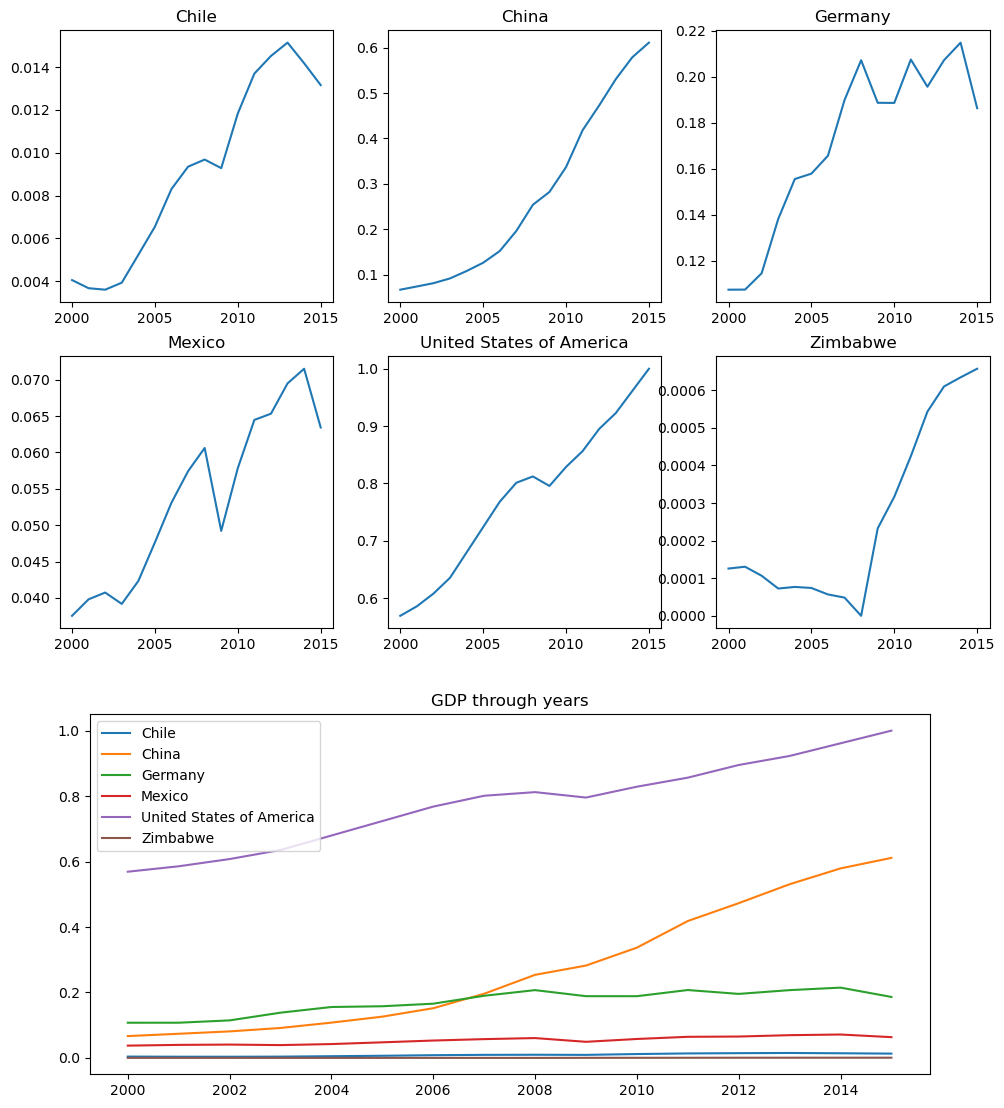

In [169]:
index = 0
plt.figure(figsize=(12, 12))

for k in df['Country'].unique():    
    plt.subplot(3, 3, index + 1)
    plt.plot(df[df['Country'] == k]['Year'], df[df['Country'] == k]['gdp_scaled'])
    
    plt.title(k)

    ax = plt.subplot(3, 3, len(df['Country'].unique()) + 1)
    plt.plot(df[df['Country'] == k]['Year'], df[df['Country'] == k]['gdp_scaled'])
    ax.set_position([0.15, 0.01, 0.7, 0.3])
    
    index += 1

plt.legend(df['Country'].unique(), loc=2)
    
plt.title('GDP through years')
        
    
plt.show()